# CODSOFT INTERNSHIP

**TASK-2:Iris Flower Classification**

Author:Aakash P

Domain:Data Science

Batch:January-25

In [1]:
#importing libraries for data processing and modelling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [3]:
#downloading datasets
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df['species'],categories =pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
df.shape

(150, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<Axes: >

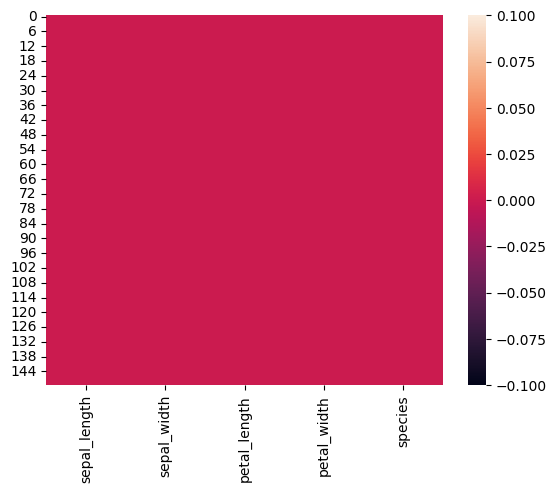

In [11]:
#visualizing the missing values using heatmap
sns.heatmap(df.isnull())

In [12]:
#detecting missing values
df.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


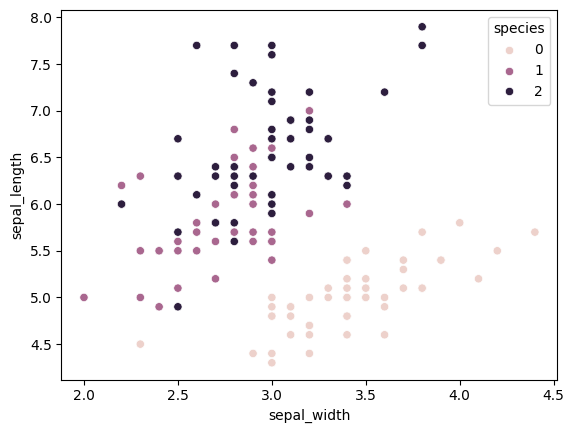

In [13]:
#visualing data in scatter plot
sns.scatterplot(data=df,x='sepal_width',y='sepal_length',hue='species');

In [17]:
#using KMeans for clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)

In [18]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [19]:
#fit the model to data
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [20]:
y_predicted = kmeans.labels_

In [22]:
df['cluster'] = y_predicted
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1,0
96,5.7,2.9,4.2,1.3,1,0
97,6.2,2.9,4.3,1.3,1,0
98,5.1,2.5,3.0,1.1,1,0


In [24]:
#import Metrics to Check accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [25]:
#assuming 'species' is the target variable
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

In [26]:
#split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
#fit the KMeans model to the training data
kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=0)

In [28]:
#predict the labels for the test data
Y_pred = kmeans.predict(X_test)

In [29]:
#evaluating accuracy
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score: 0.1000
